# 📊 SMAC Data Visualization
Kết nối 2 database và tạo biểu đồ phân tích:
- **detections.db**: Dữ liệu phát hiện người
- **gate_system.db**: Lịch sử cổng on/off

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import os

# Thiết lập style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

In [2]:
# 1. KẾT NỐI 2 DATABASE
detections_db = 'detections.db'
gate_db = 'gate_system.db'

# Kết nối detections database
conn_det = sqlite3.connect(detections_db)
print(f"✅ Đã kết nối: {detections_db}")

# Kết nối gate_system database  
conn_gate = sqlite3.connect(gate_db)
print(f"✅ Đã kết nối: {gate_db}")

✅ Đã kết nối: detections.db
✅ Đã kết nối: gate_system.db


In [3]:
# 2. ĐỌC DỮ LIỆU TỪ 2 DATABASE

# Dữ liệu phát hiện người
try:
    df_detections = pd.read_sql_query(
        "SELECT * FROM detections ORDER BY id DESC", conn_det
    )
    print(f"📊 Detections: {len(df_detections)} bản ghi")
except Exception as e:
    print(f"⚠️ Lỗi đọc detections: {e}")
    df_detections = pd.DataFrame()

# Dữ liệu logs cổng
try:
    df_logs = pd.read_sql_query(
        "SELECT * FROM logs ORDER BY id DESC", conn_gate
    )
    print(f"📊 Gate Logs: {len(df_logs)} bản ghi")
except Exception as e:
    print(f"⚠️ Lỗi đọc gate logs: {e}")
    df_logs = pd.DataFrame()

# Hiển thị mẫu dữ liệu
print("\n--- Detections (5 mới nhất) ---")
display(df_detections.head())

print("\n--- Gate Logs (5 mới nhất) ---")
display(df_logs.head())

📊 Detections: 17 bản ghi
📊 Gate Logs: 5 bản ghi

--- Detections (5 mới nhất) ---


,id,person_count,datetime,confidence,image_path
0,17,1,31/12/2025 17:06:33,0.924993,D:\SMAC\src\..\database\data_images\person_202...
1,16,1,31/12/2025 17:06:10,0.938307,D:\SMAC\src\..\database\data_images\person_202...
2,15,1,31/12/2025 17:06:08,0.939687,D:\SMAC\src\..\database\data_images\person_202...
3,14,1,31/12/2025 17:05:47,0.904878,D:\SMAC\src\..\database\data_images\person_202...
4,13,1,31/12/2025 17:05:40,0.898185,D:\SMAC\src\..\database\data_images\person_202...



--- Gate Logs (5 mới nhất) ---


,id,timestamp,event_type,description
0,5,2025-12-31 16:35:29,GATE_ON,Manual control - ON
1,4,2025-12-31 16:35:20,GATE_OFF,Manual control - OFF
2,3,2025-12-31 16:35:17,GATE_ON,Manual control - ON
3,2,2025-12-31 16:35:15,GATE_OFF,Manual control - OFF
4,1,2025-12-31 16:35:12,GATE_ON,Manual control - ON


In [4]:
# 3. XỬ LÝ DỮ LIỆU

# Parse datetime cho detections
if not df_detections.empty and 'datetime' in df_detections.columns:
    df_detections['datetime'] = pd.to_datetime(
        df_detections['datetime'], 
        format='%d/%m/%Y %H:%M:%S',
        errors='coerce'
    )
    df_detections = df_detections.dropna(subset=['datetime'])

# Parse datetime cho logs
if not df_logs.empty and 'timestamp' in df_logs.columns:
    df_logs['timestamp'] = pd.to_datetime(
        df_logs['timestamp'],
        errors='coerce'
    )
    df_logs = df_logs.dropna(subset=['timestamp'])

# Tách gate events
if not df_logs.empty:
    df_gate_open = df_logs[df_logs['event_type'].str.contains('OPEN|ON', na=False)]
    df_gate_close = df_logs[df_logs['event_type'].str.contains('CLOSE|OFF', na=False)]
    print(f"🚪 Gate OPEN events: {len(df_gate_open)}")
    print(f"🔒 Gate CLOSE events: {len(df_gate_close)}")

🚪 Gate OPEN events: 3
🔒 Gate CLOSE events: 2


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8228\3852905917.py:84: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8228\3852905917.py:84: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8228\3852905917.py:84: UserWarning: Glyph 128682 (\N{DOOR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8228\3852905917.py:84: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8228\3852905917.py:84: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8228\3852905917.py:85: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.savefig('smac_analytics.png', dpi=150

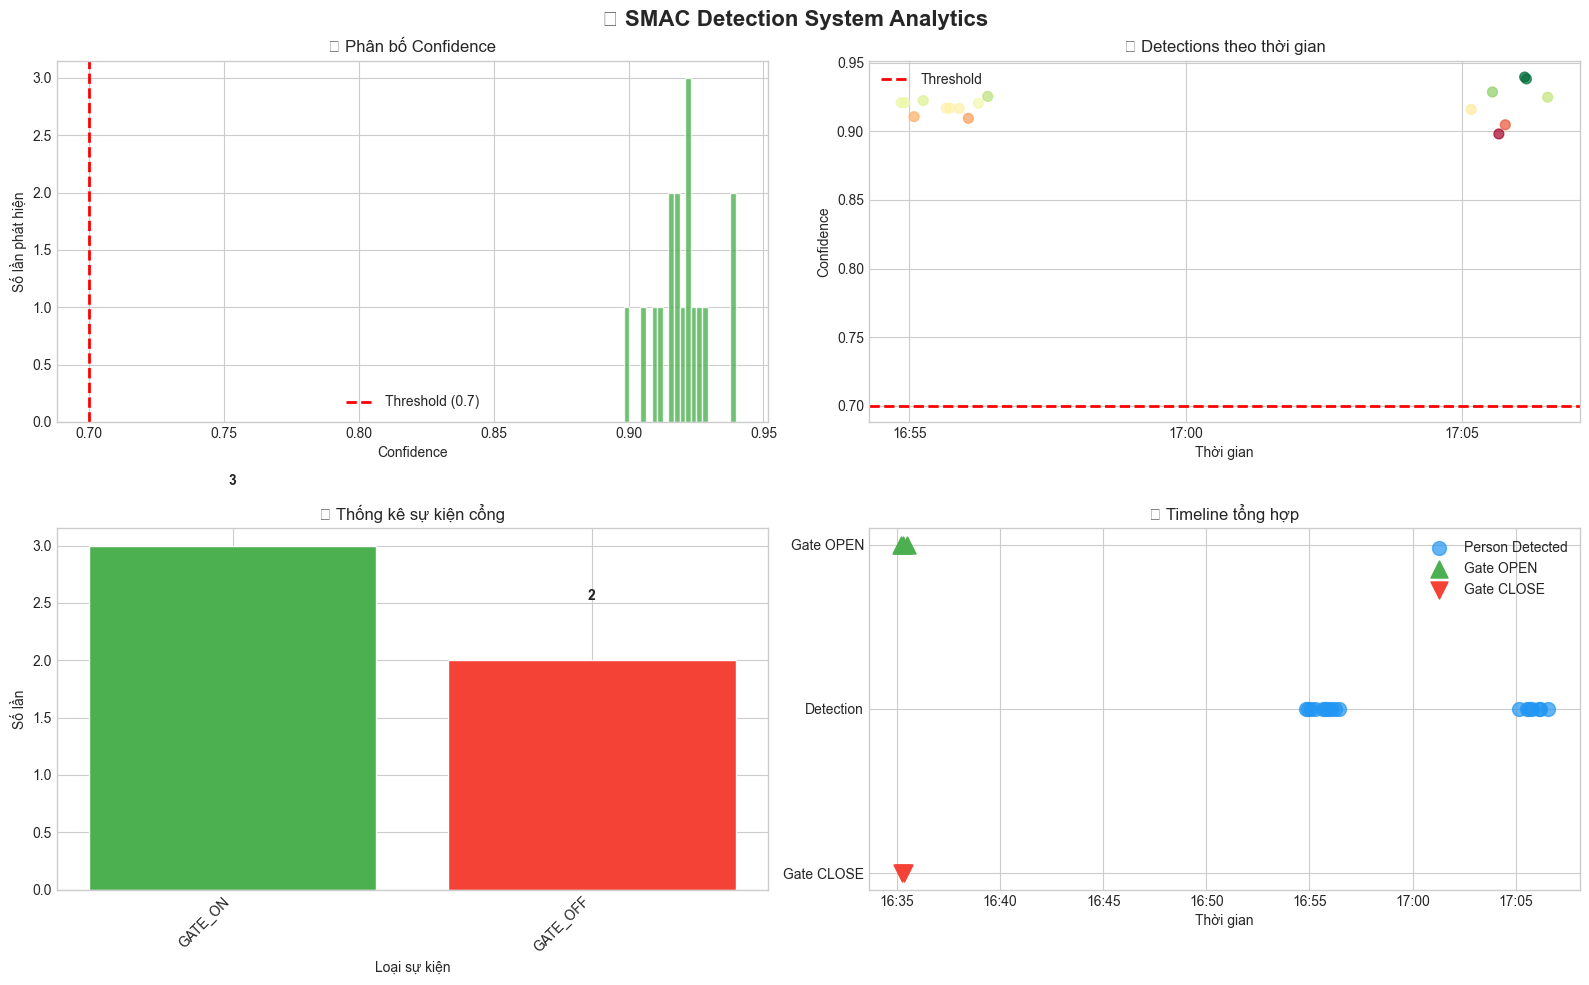


✅ Đã lưu biểu đồ: smac_analytics.png


In [5]:
# 4. TẠO BIỂU ĐỒ TỔNG HỢP

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('📊 SMAC Detection System Analytics', fontsize=16, fontweight='bold')

# --- SUBPLOT 1: Confidence Distribution ---
ax1 = axes[0, 0]
if not df_detections.empty and 'confidence' in df_detections.columns:
    ax1.hist(df_detections['confidence'], bins=20, color='#4CAF50', edgecolor='white', alpha=0.8)
    ax1.axvline(x=0.7, color='red', linestyle='--', linewidth=2, label='Threshold (0.7)')
    ax1.set_xlabel('Confidence')
    ax1.set_ylabel('Số lần phát hiện')
    ax1.set_title('📈 Phân bố Confidence')
    ax1.legend()
else:
    ax1.text(0.5, 0.5, 'Không có dữ liệu', ha='center', va='center', fontsize=14)
    ax1.set_title('📈 Phân bố Confidence')

# --- SUBPLOT 2: Detections Timeline ---
ax2 = axes[0, 1]
if not df_detections.empty and 'datetime' in df_detections.columns:
    ax2.scatter(df_detections['datetime'], df_detections['confidence'], 
                c=df_detections['confidence'], cmap='RdYlGn', s=50, alpha=0.7)
    ax2.axhline(y=0.7, color='red', linestyle='--', linewidth=2, label='Threshold')
    ax2.set_xlabel('Thời gian')
    ax2.set_ylabel('Confidence')
    ax2.set_title('⏰ Detections theo thời gian')
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax2.legend()
else:
    ax2.text(0.5, 0.5, 'Không có dữ liệu', ha='center', va='center', fontsize=14)
    ax2.set_title('⏰ Detections theo thời gian')

# --- SUBPLOT 3: Gate Events Count ---
ax3 = axes[1, 0]
if not df_logs.empty and 'event_type' in df_logs.columns:
    event_counts = df_logs['event_type'].value_counts()
    colors = ['#4CAF50' if 'OPEN' in x or 'ON' in x else '#f44336' for x in event_counts.index]
    bars = ax3.bar(event_counts.index, event_counts.values, color=colors, edgecolor='white')
    ax3.set_xlabel('Loại sự kiện')
    ax3.set_ylabel('Số lần')
    ax3.set_title('🚪 Thống kê sự kiện cổng')
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')
    
    # Add value labels on bars
    for bar, val in zip(bars, event_counts.values):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                 str(val), ha='center', va='bottom', fontweight='bold')
else:
    ax3.text(0.5, 0.5, 'Không có dữ liệu', ha='center', va='center', fontsize=14)
    ax3.set_title('🚪 Thống kê sự kiện cổng')

# --- SUBPLOT 4: Combined Timeline ---
ax4 = axes[1, 1]
has_data = False

# Plot detections
if not df_detections.empty and 'datetime' in df_detections.columns:
    ax4.scatter(df_detections['datetime'], [1]*len(df_detections), 
                marker='o', s=100, c='#2196F3', label='Person Detected', alpha=0.7)
    has_data = True

# Plot gate events
if not df_logs.empty and 'timestamp' in df_logs.columns:
    if 'df_gate_open' in dir() and not df_gate_open.empty:
        ax4.scatter(df_gate_open['timestamp'], [2]*len(df_gate_open), 
                    marker='^', s=150, c='#4CAF50', label='Gate OPEN')
    if 'df_gate_close' in dir() and not df_gate_close.empty:
        ax4.scatter(df_gate_close['timestamp'], [0]*len(df_gate_close), 
                    marker='v', s=150, c='#f44336', label='Gate CLOSE')
    has_data = True

if has_data:
    ax4.set_yticks([0, 1, 2])
    ax4.set_yticklabels(['Gate CLOSE', 'Detection', 'Gate OPEN'])
    ax4.set_xlabel('Thời gian')
    ax4.set_title('📅 Timeline tổng hợp')
    ax4.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    ax4.legend(loc='upper right')
else:
    ax4.text(0.5, 0.5, 'Không có dữ liệu', ha='center', va='center', fontsize=14)
    ax4.set_title('📅 Timeline tổng hợp')

plt.tight_layout()
plt.savefig('smac_analytics.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Đã lưu biểu đồ: smac_analytics.png")

In [6]:
# 5. THỐNG KÊ TỔNG HỢP

print("=" * 50)
print("📊 THỐNG KÊ TỔNG HỢP SMAC")
print("=" * 50)

if not df_detections.empty:
    print(f"\n👤 PERSON DETECTIONS:")
    print(f"   - Tổng số lần phát hiện: {len(df_detections)}")
    print(f"   - Confidence trung bình: {df_detections['confidence'].mean():.2f}")
    print(f"   - Confidence cao nhất: {df_detections['confidence'].max():.2f}")
    print(f"   - Confidence thấp nhất: {df_detections['confidence'].min():.2f}")

if not df_logs.empty:
    print(f"\n🚪 GATE EVENTS:")
    print(f"   - Tổng số events: {len(df_logs)}")
    for event_type, count in df_logs['event_type'].value_counts().items():
        print(f"   - {event_type}: {count} lần")

print("\n" + "=" * 50)

📊 THỐNG KÊ TỔNG HỢP SMAC

👤 PERSON DETECTIONS:
   - Tổng số lần phát hiện: 17
   - Confidence trung bình: 0.92
   - Confidence cao nhất: 0.94
   - Confidence thấp nhất: 0.90

🚪 GATE EVENTS:
   - Tổng số events: 5
   - GATE_ON: 3 lần
   - GATE_OFF: 2 lần



In [7]:
# 6. ĐÓNG KẾT NỐI
conn_det.close()
conn_gate.close()
print("✅ Đã đóng tất cả kết nối database")

✅ Đã đóng tất cả kết nối database
